<h1>Conteúdo<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Interagindo-com-ATP" data-toc-modified-id="Interagindo-com-ATP-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Interagindo com ATP</a></span><ul class="toc-item"><li><span><a href="#Tratamento-de-dados" data-toc-modified-id="Tratamento-de-dados-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tratamento de dados</a></span></li><li><span><a href="#Geração-dos-gráficos" data-toc-modified-id="Geração-dos-gráficos-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Geração dos gráficos</a></span></li></ul></li><li><span><a href="#Interagindo-com-Matlab" data-toc-modified-id="Interagindo-com-Matlab-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Interagindo com <em>Matlab</em></a></span><ul class="toc-item"><li><span><a href="#Importando-os-dados" data-toc-modified-id="Importando-os-dados-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Importando os dados</a></span></li><li><span><a href="#Accediendo-às-variáveis-e-tratando-os-dados" data-toc-modified-id="Accediendo-às-variáveis-e-tratando-os-dados-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Accediendo às variáveis e tratando os dados</a></span></li><li><span><a href="#Gerando-gráficos" data-toc-modified-id="Gerando-gráficos-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Gerando gráficos</a></span></li></ul></li></ul></div>

# Interagindo com ATP
*Python* tem a possibilidade de rodar programas externos do mesmo modo que se fosse no command promt. Para fazer isto é necessário importar o módulo **subprocess** e usar o método `run(commando, shell = True)`. **Nota: A opção shell=True é necessária para que ele Python entenda que vai rodar o ATP na consola**. 

A continuação foi feito um exemplo para rodar o ATP tanto no windows quanto no Linux. Os módulo sys e os foram usados para detetar o direitório de trabalho e o tipo de sistema operativo. 

Qualquer archvo ATP pode ser rodado desde o código midando o *fileName*

In [1]:
# Ejecuta el archivo de atp
import subprocess
import sys, os

fileName = 'estudio_v2.atp'


# Get the opperative system
operativeSystem = sys.platform

# get the working directory
if operativeSystem == 'linux':
    working_dir = os.getcwd() + "/" + 'ATP' + "/"
    ATPexe = os.environ['HOME'] + '/' + '.wine/drive_c/Program Files/ATP/tools/runAtp.exe'
    subprocess.run(['wine ' + '"' + ATPexe + '" ' + '"' + working_dir + fileName + '"'], shell=True)
else:
    working_dir = os.getcwd() + "\\" + 'ATP' + "\\"
    subprocess.run([r"runAtp.exe" ,r'"' + working_dir + fileName + '"'])

## Tratamento de dados
Depois de rodar o arquivo do ATP é gerado um arquivo .txt com a solução do sistema. Para importar os dados no *Python* é necessário fazer um tratamento ao arquivo. Para isso a gente vai usar o módulo pandas.

    Lembre que para gerar o arquivo .txt é necessário modificar no startup do ATPLaunche a aba número 7 nos comandos PL4TYP para .txt e o FMTPL4 para wide08 ou wide10.

In [2]:
# Carga los datos
import pandas as pd

filepath = working_dir + fileName[:len(fileName)-4] + '.txt'

df = pd.read_csv(filepath, skiprows=3, delim_whitespace=True, header=-1)
df2 = pd.read_csv(filepath, delim_whitespace=True, skiprows=1)
df.columns = df2.columns
df = df.loc[1:2000,:]
df.head()

,in,FA,FB,FC,FA1,FB1,FC1,L100A,L100B,L100C,...,LFA,LFB,LFC,LPXA.1,LPXB.1,LPXC.1,LFA.1,LFB.1,LFC.1,FALLA
1,.5E-4,413142.,-75610.0,-338000.0,413144.0,-75640.0,-338000.0,404571.0,-195000.0,-209000.0,...,404571.0,-195000.0,-209000.0,0.0,0.0,0.0,1352.94,-788.52,-564.42,0.0
2,.1E-3,410219.,-67427.0,-343000.0,410221.0,-67458.0,-343000.0,404356.0,-188000.0,-216000.0,...,404356.0,-188000.0,-216000.0,0.0,0.0,0.0,1355.09,-767.49,-587.61,0.0
3,.15E-3,407149.,-59221.0,-348000.0,407152.0,-59252.0,-348000.0,403976.0,-182000.0,-222000.0,...,403976.0,-182000.0,-222000.0,0.0,0.0,0.0,1356.77,-746.19,-610.58,0.0
4,.2E-3,403935.,-50994.0,-353000.0,403939.0,-51025.0,-353000.0,403464.0,-175000.0,-229000.0,...,403464.0,-175000.0,-229000.0,0.0,0.0,0.0,1357.95,-724.61,-633.33,0.0
5,.25E-3,400578.,-42748.0,-358000.0,400582.0,-42779.0,-358000.0,402817.0,-168000.0,-235000.0,...,402817.0,-168000.0,-235000.0,0.0,0.0,0.0,1358.66,-702.79,-655.87,0.0


## Geração dos gráficos
Depois de ter os dados guardados como *DataFrames* é possível graficar eles usando o módulo *matplotlib.pyplot*

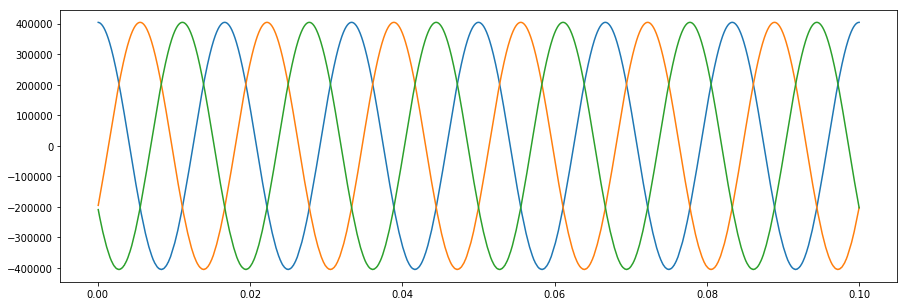

In [3]:
# Plot  % matplotlib inline|nbagg
# Usar matplotlib 2.0.0 e numpy 1.12.1
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
t = df.loc[:,'in']
Vin = df.loc[:,'L100A':'L100C']

plt.figure(figsize = (15,5))
plt.plot(t,Vin)
plt.show()

# Interagindo com *Matlab*
## Importando os dados
Para interagir com Matlab a gente pode fazer do mesmo jeito apresentado anteriormente ou simplesmente pegar um arquivo .mat pronto. O módulo **scipy.io** ajuda a gente nessa tarefa usando o método loadmat() dentro disponível em sio. 

In [4]:
import scipy.io as sio

folder = 'Matlab/'

mat_contents = sio.loadmat(folder + 'test_matlab.mat') # Importa o arquivo .mat

Depois de importat os dados na varíavel mat_contents é possível ver que variáveis foram importadas usando o método **keys()**. 

In [5]:
print (mat_contents.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Po', 'fobj_op', 'mostrar', 'Fi2', 'GWt', 'Fo', 'n_circ', 'Vl', 'f', 'rsuelo', 'flechasw', 'feixemax', 'mdcmax', 'hmax', 'tamb', 'vanoviento', 'SIL_Original', 'Costo_Original', 'ROW_Original', 'Altura_Original', 'tty', 'ht', 'Cx', 'Cy', 'cty', 'cf', 'D', 'h', 'cnum', 'rx', 'ry', 'rxc', 'ryc', 'Ecrit_aux', 'Rext', 'Rcc', 'kgkm', 'kgf', 'secc', 'Rin', 'Ecrit', 'costkgkm', 'flechaf', 'flechaf2', 'flechaEDS', 'Pb', 'dr', 'Df', 'G', 'x', 'y', 'it', 'G_aux', 'GW', 'Z', 'Y', 'C', 'Q', 'E', 'Esup', 'bc', 'mdc', 'Zabc', 'Yabc', 'Zabct', 'Yabct', 'Z012', 'Y012', 'Z0', 'Y0', 'Zc', 'SIL', 'SILt', 'GWs', 'EMAGmax', 'Zs', 'Ys', 'Cs', 'Qs', 'Pl', 'P0t', 'largura', 'Qt', 'cTpy', 'CtX', 'CtY', 'Cm', 'CmT', 'feixe', 'Esup_aux', 'ind', 'costo', 'altura', 'f1', 'f2', 'f3', 'f4', 'W', 'Fo2', 'p1_0', 'p2_0', 'p1_1', 'p2_1', 'p1_2', 'p2_2', 'p1', 'p2', 'p3', 'p4', 'p5_0', 'p5', 'p6', 'p7', 'p8', 'P', 'name', 'longitud', 'Pcarga', 'fp', 'Pcomp', 'Vf', 'Re

## Accediendo às variáveis e tratando os dados
Repara que mat_contents é um diccionario, portanto, é possível acceder a cada uma das variáveis da forma usual com os diccionários. No entanto, os dados carregados do mat_contents são tuplas (inmmutáveis). Para conseguir fazer operações com eles é necessário transformar eles. Neste caso, vamos a transformar as variáveis em vectores columna usando o método *reshape()* dentro do módulo **numpy**

In [6]:
import numpy as np

GW = (mat_contents['GWt'])
xc = (mat_contents['GWs'][:,4]).reshape([-1,1])
yc = (mat_contents['GWs'][:,5]).reshape([-1,1])
r  = (mat_contents['GWs'][:,1]).reshape([-1,1])
q  = (mat_contents['Qs'][:,0]).reshape([-1,1])

## Gerando gráficos
Podemos fazer qualquer tipo de operação com os dados tipo *array* como por exemplo graficar o condeúdo deles. 

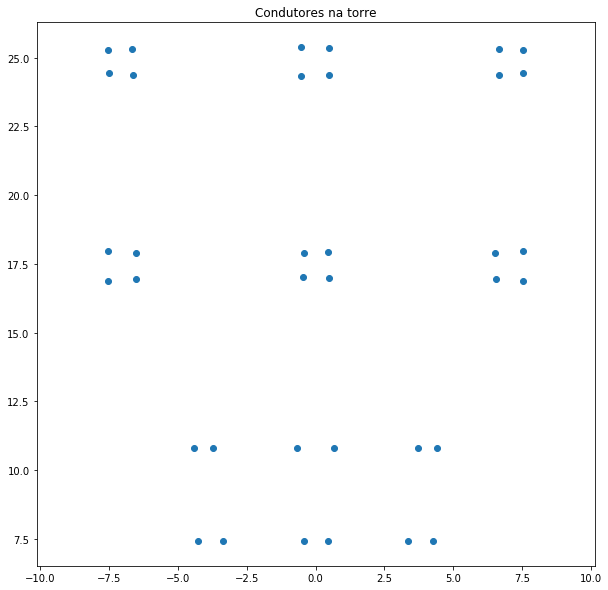

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
plt.scatter(xc, yc)
plt.axis('equal')
plt.title('Condutores na torre')
plt.show()